In [1]:
import pandas as pd
import numpy as np


In [2]:
ap_data = pd.read_excel("all_data_7.xlsx")

In [3]:
ap_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 17 columns):
date            672 non-null datetime64[ns]
all_num         672 non-null int64
rank            672 non-null int64
temp            672 non-null float64
humid           672 non-null float64
co2             672 non-null float64
voc             672 non-null float64
pm25            672 non-null float64
light           672 non-null float64
noise           672 non-null float64
기온              672 non-null float64
강수량             672 non-null float64
풍속              672 non-null float64
습도              672 non-null int64
date_day        672 non-null int64
date_hour       672 non-null int64
date_weekday    672 non-null int64
dtypes: datetime64[ns](1), float64(10), int64(6)
memory usage: 89.4 KB


In [4]:
ap_data.set_index(ap_data['date'], inplace=True)

In [5]:
ap_data

,date,all_num,rank,temp,humid,co2,voc,pm25,light,noise,기온,강수량,풍속,습도,date_day,date_hour,date_weekday
date,,,,,,,,,,,,,,,,,
2019-09-20 00:00:00,2019-09-20 00:00:00,1,1,25.7250,41.9375,4168.2000,561.1625,2.9250,135.3625,50.1000,18.8,0.0,1.5,73,20,0,4
2019-09-20 01:00:00,2019-09-20 01:00:00,0,1,25.8750,43.3125,3699.7375,531.6500,3.2750,0.0000,50.0875,19.1,0.0,0.2,72,20,1,4
2019-09-20 02:00:00,2019-09-20 02:00:00,0,1,26.0375,43.9500,3313.8625,508.0750,3.6500,0.0000,50.0750,17.8,0.0,0.2,85,20,2,4
2019-09-20 03:00:00,2019-09-20 03:00:00,0,1,25.6625,46.5750,2379.5625,403.8250,4.6625,171.5125,51.7000,17.5,0.0,0.1,87,20,3,4
2019-09-20 04:00:00,2019-09-20 04:00:00,0,1,25.4250,48.7875,1008.6500,209.7375,6.8500,0.0000,50.2250,17.3,0.0,0.0,86,20,4,4
2019-09-20 05:00:00,2019-09-20 05:00:00,0,1,25.5375,50.3375,472.6750,81.7000,7.6250,0.0000,50.3500,17.6,0.0,1.4,83,20,5,4
2019-09-20 06:00:00,2019-09-20 06:00:00,0,1,25.2125,52.3500,408.5875,66.9000,7.4375,1.0375,51.0000,17.9,0.0,2.2,80,20,6,4
2019-09-20 07:00:00,2019-09-20 07:00:00,4,1,24.7625,55.1500,427.7750,64.6250,6.2250,391.4625,51.7125,17.3,0.0,0.9,84,20,7,4
2019-09-20 08:00:00,2019-09-20 08:00:00,10,1,25.1375,55.2500,545.8000,104.3125,5.5875,433.3875,52.1750,18.2,0.0,1.1,82,20,8,4


Text(0, 0.5, '대여횟수')

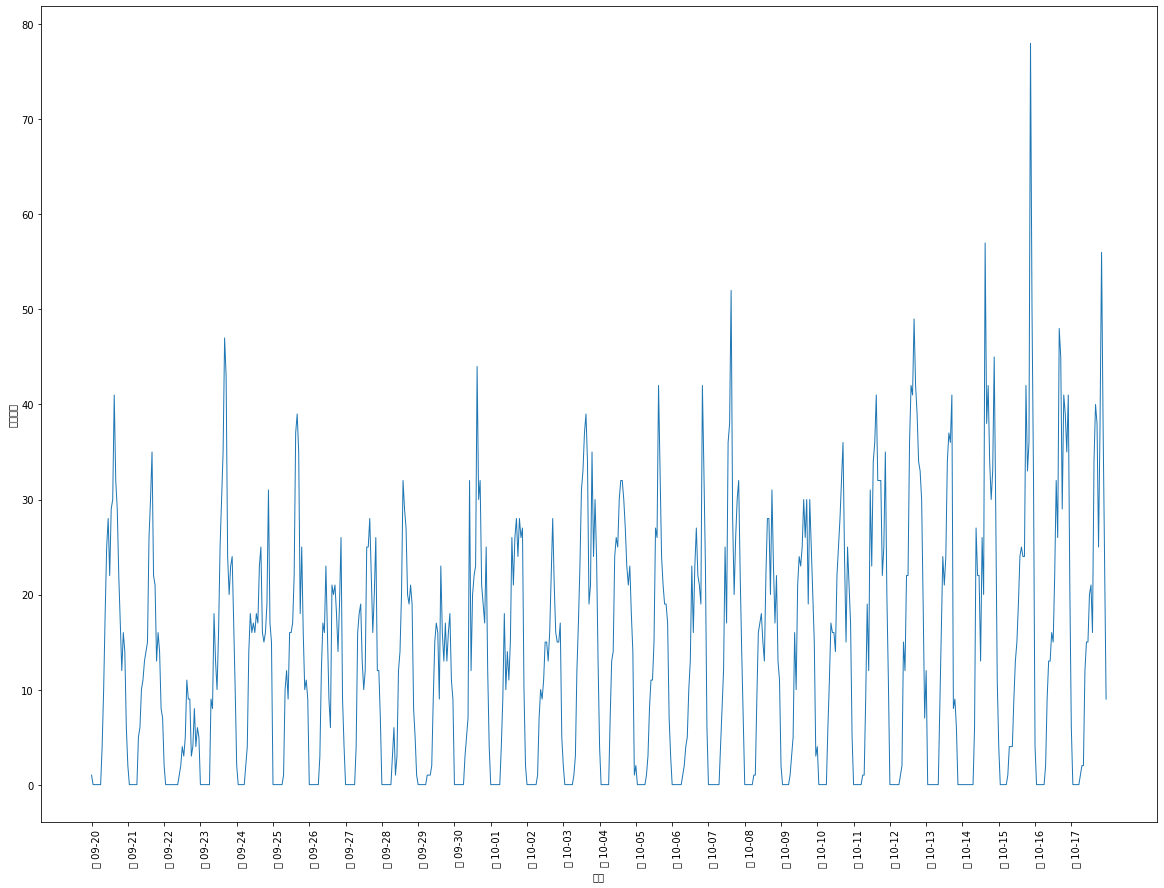

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20,15))
xticks = pd.date_range(start = '2019-09-20', end ='2019-10-17')
week  = ["일","월","화","수","목","금","토"]
xticks_name = [week[int(w)]+d for w, d in zip(xticks.strftime("%w"),
                                             xticks.strftime(" %m-%d"))]

plt.xticks(xticks, xticks_name, rotation = 90, ha = "left")
plt.plot(ap_data['all_num'],linewidth = 1)
plt.xlabel("날짜")
plt.ylabel("대여횟수")

In [18]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

X = ap_data['date']
y = ap_data['all_num']

model1 = DecisionTreeClassifier(max_depth=10, random_state=0).fit(X, y)
model2 = BaggingClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=100, random_state=0).fit(X, y)


x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = y[:,0].min() - 1, y[:, 0].max() + 1



xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
plt.subplot(121)
Z1 = model1.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z1, alpha=0.6, cmap=mpl.cm.jet)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, s=50, cmap=mpl.cm.jet, edgecolors="k")
plt.title("개별 모형")
plt.subplot(122)
Z2 = model2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z2, alpha=0.6, cmap=mpl.cm.jet)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, s=50, cmap=mpl.cm.jet, edgecolors="k")
plt.title("배깅 모형")
plt.suptitle("붓꽃 데이터의 분류 결과")
plt.tight_layout()
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[1.5689375e+18 1.5689412e+18 1.5689448e+18 1.5689484e+18 1.5689520e+18
 1.5689555e+18 1.5689592e+18 1.5689628e+18 1.5689664e+18 1.5689700e+18
 1.5689735e+18 1.5689773e+18 1.5689808e+18 1.5689844e+18 1.5689880e+18
 1.5689915e+18 1.5689953e+18 1.5689988e+18 1.5690024e+18 1.5690060e+18
 1.5690096e+18 1.5690133e+18 1.5690168e+18 1.5690204e+18 1.5690240e+18
 1.5690276e+18 1.5690313e+18 1.5690348e+18 1.5690384e+18 1.5690420e+18
 1.5690456e+18 1.5690491e+18 1.5690528e+18 1.5690564e+18 1.5690600e+18
 1.5690636e+18 1.5690671e+18 1.5690709e+18 1.5690744e+18 1.5690780e+18
 1.5690816e+18 1.5690851e+18 1.5690889e+18 1.5690924e+18 1.5690960e+18
 1.5690996e+18 1.5691031e+18 1.5691069e+18 1.5691104e+18 1.5691140e+18
 1.5691176e+18 1.5691212e+18 1.5691249e+18 1.5691284e+18 1.5691320e+18
 1.5691356e+18 1.5691392e+18 1.5691429e+18 1.5691464e+18 1.5691500e+18
 1.5691536e+18 1.5691572e+18 1.5691607e+18 1.5691644e+18 1.5691680e+18
 1.5691716e+18 1.5691752e+18 1.5691787e+18 1.5691825e+18 1.5691860e+18
 1.5691896e+18 1.5691932e+18 1.5691967e+18 1.5692005e+18 1.5692040e+18
 1.5692076e+18 1.5692112e+18 1.5692147e+18 1.5692185e+18 1.5692220e+18
 1.5692256e+18 1.5692292e+18 1.5692328e+18 1.5692365e+18 1.5692400e+18
 1.5692436e+18 1.5692472e+18 1.5692508e+18 1.5692545e+18 1.5692580e+18
 1.5692616e+18 1.5692652e+18 1.5692688e+18 1.5692723e+18 1.5692760e+18
 1.5692796e+18 1.5692832e+18 1.5692868e+18 1.5692903e+18 1.5692941e+18
 1.5692976e+18 1.5693012e+18 1.5693048e+18 1.5693083e+18 1.5693121e+18
 1.5693156e+18 1.5693192e+18 1.5693228e+18 1.5693263e+18 1.5693301e+18
 1.5693336e+18 1.5693372e+18 1.5693408e+18 1.5693444e+18 1.5693481e+18
 1.5693516e+18 1.5693552e+18 1.5693588e+18 1.5693624e+18 1.5693659e+18
 1.5693696e+18 1.5693732e+18 1.5693768e+18 1.5693804e+18 1.5693839e+18
 1.5693876e+18 1.5693912e+18 1.5693948e+18 1.5693984e+18 1.5694019e+18
 1.5694057e+18 1.5694092e+18 1.5694128e+18 1.5694164e+18 1.5694199e+18
 1.5694237e+18 1.5694272e+18 1.5694308e+18 1.5694344e+18 1.5694379e+18
 1.5694417e+18 1.5694452e+18 1.5694488e+18 1.5694524e+18 1.5694560e+18
 1.5694597e+18 1.5694632e+18 1.5694668e+18 1.5694704e+18 1.5694740e+18
 1.5694775e+18 1.5694812e+18 1.5694848e+18 1.5694884e+18 1.5694920e+18
 1.5694955e+18 1.5694992e+18 1.5695028e+18 1.5695064e+18 1.5695100e+18
 1.5695135e+18 1.5695173e+18 1.5695208e+18 1.5695244e+18 1.5695280e+18
 1.5695315e+18 1.5695353e+18 1.5695388e+18 1.5695424e+18 1.5695460e+18
 1.5695496e+18 1.5695533e+18 1.5695568e+18 1.5695604e+18 1.5695640e+18
 1.5695676e+18 1.5695713e+18 1.5695748e+18 1.5695784e+18 1.5695820e+18
 1.5695856e+18 1.5695891e+18 1.5695928e+18 1.5695964e+18 1.5696000e+18
 1.5696036e+18 1.5696071e+18 1.5696108e+18 1.5696144e+18 1.5696180e+18
 1.5696216e+18 1.5696251e+18 1.5696289e+18 1.5696324e+18 1.5696360e+18
 1.5696396e+18 1.5696431e+18 1.5696469e+18 1.5696504e+18 1.5696540e+18
 1.5696576e+18 1.5696612e+18 1.5696649e+18 1.5696684e+18 1.5696720e+18
 1.5696756e+18 1.5696792e+18 1.5696829e+18 1.5696864e+18 1.5696900e+18
 1.5696936e+18 1.5696972e+18 1.5697007e+18 1.5697044e+18 1.5697080e+18
 1.5697116e+18 1.5697152e+18 1.5697187e+18 1.5697224e+18 1.5697260e+18
 1.5697296e+18 1.5697332e+18 1.5697367e+18 1.5697405e+18 1.5697440e+18
 1.5697476e+18 1.5697512e+18 1.5697547e+18 1.5697585e+18 1.5697620e+18
 1.5697656e+18 1.5697692e+18 1.5697728e+18 1.5697765e+18 1.5697800e+18
 1.5697836e+18 1.5697872e+18 1.5697908e+18 1.5697945e+18 1.5697980e+18
 1.5698016e+18 1.5698052e+18 1.5698088e+18 1.5698123e+18 1.5698160e+18
 1.5698196e+18 1.5698232e+18 1.5698268e+18 1.5698303e+18 1.5698340e+18
 1.5698376e+18 1.5698412e+18 1.5698448e+18 1.5698483e+18 1.5698521e+18
 1.5698556e+18 1.5698592e+18 1.5698628e+18 1.5698663e+18 1.5698701e+18
 1.5698736e+18 1.5698772e+18 1.5698808e+18 1.5698844e+18 1.5698881e+18
 1.5698916e+18 1.5698952e+18 1.5698988e+18 1.5699024e+18 1.5699061e+18
 1.5699096e+18 1.5699132e+18 1.5699168e+18 1.5699204e+18 1.5699239e+18
 1.5699276e+18 1.5699312e+18 1.5699348e+18 1.5699384e+18 1.5699419e+18
 1.5699456e+18 1.5699492e+18 1.5699528e+18 1.5699564e+18 1.5699599e+18
 1.5699637e+18 1.5699672e+18 1.5699708e+18 1.5699744e+18 1.5699779e+18
 1.5699817e+18 1.5699852e+18 1.5699888e+18 1.5699924e+18 1.5699960e+18
 1.5699997e+18 1.5700032e+18 1.5700068e+18 1.5700104e+18 1.5700140e+18
 1.5700177e+18 1.5700212e+18 1.5700248e+18 1.5700284e+18 1.5700320e+18
 1.5700355e+18 1.5700392e+18 1.5700428e+18 1.5700464e+18 1.5700500e+18
 1.5700535e+18 1.5700572e+18 1.5700608e+18 1.5700644e+18 1.5700680e+18
 1.5700715e+18 1.5700753e+18 1.5700788e+18 1.5700824e+18 1.5700860e+18
 1.5700895e+18 1.5700933e+18 1.5700968e+18 1.5701004e+18 1.5701040e+18
 1.5701076e+18 1.5701113e+18 1.5701148e+18 1.5701184e+18 1.5701220e+18
 1.5701256e+18 1.5701293e+18 1.5701328e+18 1.5701364e+18 1.5701400e+18
 1.5701436e+18 1.5701471e+18 1.5701508e+18 1.5701544e+18 1.5701580e+18
 1.5701616e+18 1.5701651e+18 1.5701689e+18 1.5701724e+18 1.5701760e+18
 1.5701796e+18 1.5701831e+18 1.5701869e+18 1.5701904e+18 1.5701940e+18
 1.5701976e+18 1.5702011e+18 1.5702049e+18 1.5702084e+18 1.5702120e+18
 1.5702156e+18 1.5702192e+18 1.5702229e+18 1.5702264e+18 1.5702300e+18
 1.5702336e+18 1.5702372e+18 1.5702409e+18 1.5702444e+18 1.5702480e+18
 1.5702516e+18 1.5702552e+18 1.5702587e+18 1.5702624e+18 1.5702660e+18
 1.5702696e+18 1.5702732e+18 1.5702767e+18 1.5702805e+18 1.5702840e+18
 1.5702876e+18 1.5702912e+18 1.5702947e+18 1.5702985e+18 1.5703020e+18
 1.5703056e+18 1.5703092e+18 1.5703127e+18 1.5703165e+18 1.5703200e+18
 1.5703236e+18 1.5703272e+18 1.5703308e+18 1.5703345e+18 1.5703380e+18
 1.5703416e+18 1.5703452e+18 1.5703488e+18 1.5703525e+18 1.5703560e+18
 1.5703596e+18 1.5703632e+18 1.5703668e+18 1.5703703e+18 1.5703740e+18
 1.5703776e+18 1.5703812e+18 1.5703848e+18 1.5703883e+18 1.5703921e+18
 1.5703956e+18 1.5703992e+18 1.5704028e+18 1.5704063e+18 1.5704101e+18
 1.5704136e+18 1.5704172e+18 1.5704208e+18 1.5704243e+18 1.5704281e+18
 1.5704316e+18 1.5704352e+18 1.5704388e+18 1.5704424e+18 1.5704461e+18
 1.5704496e+18 1.5704532e+18 1.5704568e+18 1.5704604e+18 1.5704639e+18
 1.5704676e+18 1.5704712e+18 1.5704748e+18 1.5704784e+18 1.5704819e+18
 1.5704856e+18 1.5704892e+18 1.5704928e+18 1.5704964e+18 1.5704999e+18
 1.5705037e+18 1.5705072e+18 1.5705108e+18 1.5705144e+18 1.5705179e+18
 1.5705217e+18 1.5705252e+18 1.5705288e+18 1.5705324e+18 1.5705359e+18
 1.5705397e+18 1.5705432e+18 1.5705468e+18 1.5705504e+18 1.5705540e+18
 1.5705577e+18 1.5705612e+18 1.5705648e+18 1.5705684e+18 1.5705720e+18
 1.5705755e+18 1.5705792e+18 1.5705828e+18 1.5705864e+18 1.5705900e+18
 1.5705935e+18 1.5705972e+18 1.5706008e+18 1.5706044e+18 1.5706080e+18
 1.5706115e+18 1.5706153e+18 1.5706188e+18 1.5706224e+18 1.5706260e+18
 1.5706295e+18 1.5706333e+18 1.5706368e+18 1.5706404e+18 1.5706440e+18
 1.5706475e+18 1.5706513e+18 1.5706548e+18 1.5706584e+18 1.5706620e+18
 1.5706656e+18 1.5706693e+18 1.5706728e+18 1.5706764e+18 1.5706800e+18
 1.5706836e+18 1.5706871e+18 1.5706908e+18 1.5706944e+18 1.5706980e+18
 1.5707016e+18 1.5707051e+18 1.5707088e+18 1.5707124e+18 1.5707160e+18
 1.5707196e+18 1.5707231e+18 1.5707269e+18 1.5707304e+18 1.5707340e+18
 1.5707376e+18 1.5707411e+18 1.5707449e+18 1.5707484e+18 1.5707520e+18
 1.5707556e+18 1.5707592e+18 1.5707629e+18 1.5707664e+18 1.5707700e+18
 1.5707736e+18 1.5707772e+18 1.5707809e+18 1.5707844e+18 1.5707880e+18
 1.5707916e+18 1.5707952e+18 1.5707987e+18 1.5708024e+18 1.5708060e+18
 1.5708096e+18 1.5708132e+18 1.5708167e+18 1.5708204e+18 1.5708240e+18
 1.5708276e+18 1.5708312e+18 1.5708347e+18 1.5708385e+18 1.5708420e+18
 1.5708456e+18 1.5708492e+18 1.5708527e+18 1.5708565e+18 1.5708600e+18
 1.5708636e+18 1.5708672e+18 1.5708708e+18 1.5708745e+18 1.5708780e+18
 1.5708816e+18 1.5708852e+18 1.5708888e+18 1.5708925e+18 1.5708960e+18
 1.5708996e+18 1.5709032e+18 1.5709068e+18 1.5709103e+18 1.5709140e+18
 1.5709176e+18 1.5709212e+18 1.5709248e+18 1.5709283e+18 1.5709320e+18
 1.5709356e+18 1.5709392e+18 1.5709428e+18 1.5709463e+18 1.5709501e+18
 1.5709536e+18 1.5709572e+18 1.5709608e+18 1.5709643e+18 1.5709681e+18
 1.5709716e+18 1.5709752e+18 1.5709788e+18 1.5709824e+18 1.5709861e+18
 1.5709896e+18 1.5709932e+18 1.5709968e+18 1.5710004e+18 1.5710041e+18
 1.5710076e+18 1.5710112e+18 1.5710148e+18 1.5710184e+18 1.5710219e+18
 1.5710256e+18 1.5710292e+18 1.5710328e+18 1.5710364e+18 1.5710399e+18
 1.5710436e+18 1.5710472e+18 1.5710508e+18 1.5710544e+18 1.5710579e+18
 1.5710617e+18 1.5710652e+18 1.5710688e+18 1.5710724e+18 1.5710759e+18
 1.5710797e+18 1.5710832e+18 1.5710868e+18 1.5710904e+18 1.5710940e+18
 1.5710977e+18 1.5711012e+18 1.5711048e+18 1.5711084e+18 1.5711120e+18
 1.5711157e+18 1.5711192e+18 1.5711228e+18 1.5711264e+18 1.5711300e+18
 1.5711335e+18 1.5711372e+18 1.5711408e+18 1.5711444e+18 1.5711480e+18
 1.5711515e+18 1.5711552e+18 1.5711588e+18 1.5711624e+18 1.5711660e+18
 1.5711695e+18 1.5711733e+18 1.5711768e+18 1.5711804e+18 1.5711840e+18
 1.5711875e+18 1.5711913e+18 1.5711948e+18 1.5711984e+18 1.5712020e+18
 1.5712056e+18 1.5712093e+18 1.5712128e+18 1.5712164e+18 1.5712200e+18
 1.5712236e+18 1.5712273e+18 1.5712308e+18 1.5712344e+18 1.5712380e+18
 1.5712416e+18 1.5712451e+18 1.5712488e+18 1.5712524e+18 1.5712560e+18
 1.5712596e+18 1.5712631e+18 1.5712668e+18 1.5712704e+18 1.5712740e+18
 1.5712776e+18 1.5712811e+18 1.5712849e+18 1.5712884e+18 1.5712920e+18
 1.5712956e+18 1.5712991e+18 1.5713029e+18 1.5713064e+18 1.5713100e+18
 1.5713136e+18 1.5713172e+18 1.5713209e+18 1.5713244e+18 1.5713280e+18
 1.5713316e+18 1.5713352e+18 1.5713389e+18 1.5713424e+18 1.5713460e+18
 1.5713496e+18 1.5713532e+18].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.